<a href="https://colab.research.google.com/github/Muhammad-ismail2134/CODSOFT/blob/main/CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: CUSTOMER CHURN PREDICTION
In this Notebook I will train three diffrent model on the Kaggle dataset, then evaluate their classification on the basis of confusion matrix

> *Note: This notebook is a part of my internship at **Codsoft**.*



# Importing Libaries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
!pip install kaggle

In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

# Downloading Dataset from kaggle

In [ ]:
!kaggle datasets download -d shantanudhakadd/bank-customer-churn-prediction

bank-customer-churn-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


# Unzipping File

In [ ]:
import zipfile

#Unzipping training data
local_zip = './bank-customer-churn-prediction.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./bank-customer-churn-prediction')

In [ ]:
data = pd.read_csv("/content/bank-customer-churn-prediction/Churn_Modelling.csv")


Dropping null or empty cells

In [ ]:
data.dropna(inplace=True)

In [ ]:
print(data.shape[0])

10000


In [ ]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

 # Pre-processing Data

 Using the pd.get_dummies function to one-hot encode categorical variables in dataset data, while dropping the first category to avoid multicollinearity.

In [ ]:
data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)


Sperating dependent and independent variables

In [ ]:
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']


## Spliting Data
Spliting Training and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(C=0.01, solver='liblinear')

## Fitting Logistic Regression Model on Data

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

## Evaluating Model
Now we will evaluate trained model on test dataset

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8015
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.47      0.07      0.13       393

    accuracy                           0.80      2000
   macro avg       0.64      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



# Plotting Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[  29  364]
 [  33 1574]]


Confusion matrix, without normalization
[[  29  364]
 [  33 1574]]


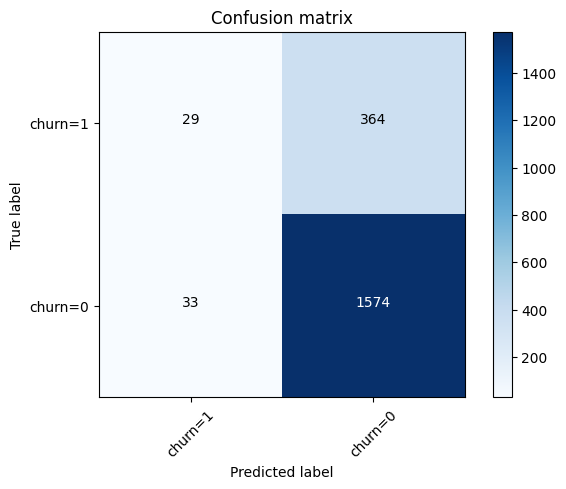

In [ ]:

cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')



---







# SVM

In this section we will use **Support Vector Machine** on the given kaggle dataset and see if it is better than Logistic Regression.



In [ ]:
data = pd.read_csv("/content/bank-customer-churn-prediction/Churn_Modelling.csv")
data.dropna(inplace=True)
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Assigning Features
We will select some features or parameters and lables from the dataset.

In [ ]:
features = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
X = np.asarray(features)

In [ ]:
data['Exited'] = data['Exited'].astype('int')
y = np.asarray(data['Exited'])


### Splitting Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 8) (8000,)
Test set: (2000, 8) (2000,)


### Fitting SVM Model on training data

In [ ]:
from sklearn import svm
model_svm = svm.SVC(kernel='sigmoid')
model_svm.fit(X_train, y_train)

SVC(kernel='sigmoid')

## Evaluating Model

Now we will evaluate our model as see if it is better than Logistic Regression.

In [ ]:
y_pred_svm = model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
y_pred_svm[:17]

Accuracy: 0.6765
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1604
           1       0.19      0.19      0.19       396

    accuracy                           0.68      2000
   macro avg       0.50      0.49      0.50      2000
weighted avg       0.68      0.68      0.68      2000



array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

### F1 Score


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_svm, average='weighted')

0.6778623516478114

### Jaccard Score

In [ ]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred_svm)

0.106353591160221

### Confusion Matrix

Confusion matrix, without normalization
[[  77  319]
 [ 328 1276]]


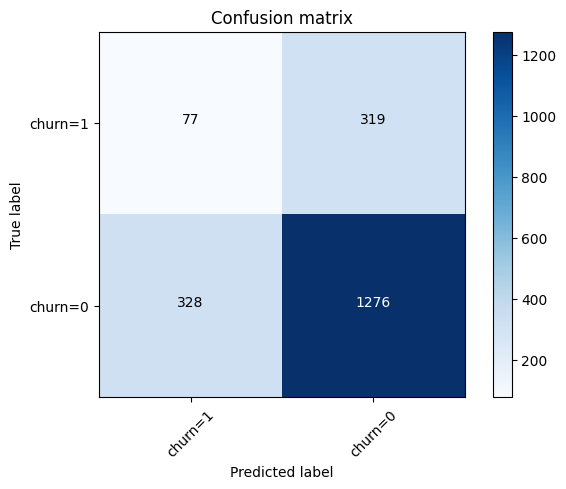

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_svm, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

## Conclusion
**SVM model isn't any better than logistic regression in this senerio**.


---



# Custom Deep Learning Model Using Keras Layers
We will make our own model using **Keras** layers.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

## Pre-Processing Data

In [ ]:
data = pd.read_csv("/content/bank-customer-churn-prediction/Churn_Modelling.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

data = pd.get_dummies(data, columns=['Gender', 'Geography'], drop_first=True)

# Step 3: Split the Data
X = data.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])
y = data['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Convert Data to NumPy Arrays
X_train_final = np.array(X_train_scaled)
X_test_final = np.array(X_test_scaled)
y_train_final = np.array(y_train)
y_test_final = np.array(y_test)

# Print shape of processed data
print("X_train shape:", X_train_final.shape)
print("X_test shape:", X_test_final.shape)
print("y_train shape:", y_train_final.shape)
print("y_test shape:", y_test_final.shape)

X_train shape: (8000, 11)
X_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)


## Making Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=(X_train_final.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


## Fitting Data on Model

In [ ]:
history = model.fit(X_train_final, y_train_final, epochs=20, batch_size=64, validation_split=0.1)

Epoch 1/20
113/113 [==============================] - 3s 8ms/step - loss: 0.4870 - accuracy: 0.7940 - val_loss: 0.4031 - val_accuracy: 0.8225
Epoch 2/20
113/113 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.8161 - val_loss: 0.3811 - val_accuracy: 0.8413
Epoch 3/20
113/113 [==============================] - 1s 6ms/step - loss: 0.4055 - accuracy: 0.8311 - val_loss: 0.3681 - val_accuracy: 0.8587
Epoch 4/20
113/113 [==============================] - 1s 6ms/step - loss: 0.3894 - accuracy: 0.8428 - val_loss: 0.3550 - val_accuracy: 0.8662
Epoch 5/20
113/113 [==============================] - 1s 7ms/step - loss: 0.3763 - accuracy: 0.8474 - val_loss: 0.3475 - val_accuracy: 0.8575
Epoch 6/20
113/113 [==============================] - 1s 6ms/step - loss: 0.3667 - accuracy: 0.8494 - val_loss: 0.3428 - val_accuracy: 0.8625
Epoch 7/20
113/113 [==============================] - 0s 4ms/step - loss: 0.3631 - accuracy: 0.8489 - val_loss: 0.3363 - val_accuracy: 0.8650
Epoch 

## Plotting Validation Accuracy and Loss along side Training Acurracy and Loss
We will use **history** varable to plot validation  accuracy and loss along side trainig accuracy and loss and if we have over or under fitted the model

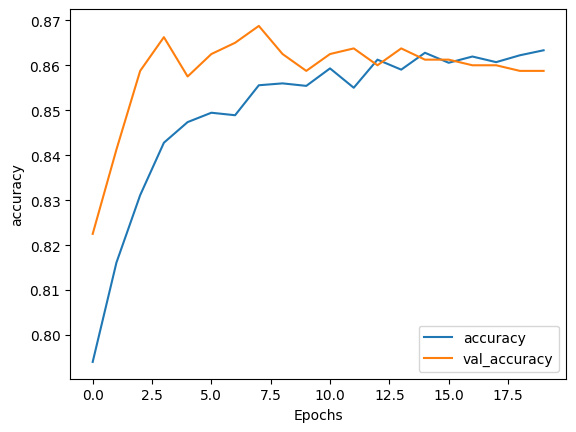

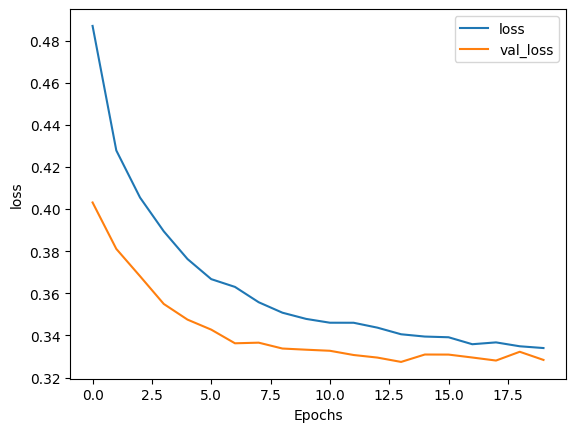

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Plotting Confusion Matrix

63/63 [==============================] - 0s 3ms/step
Confusion matrix, without normalization
[[ 190  203]
 [  77 1530]]


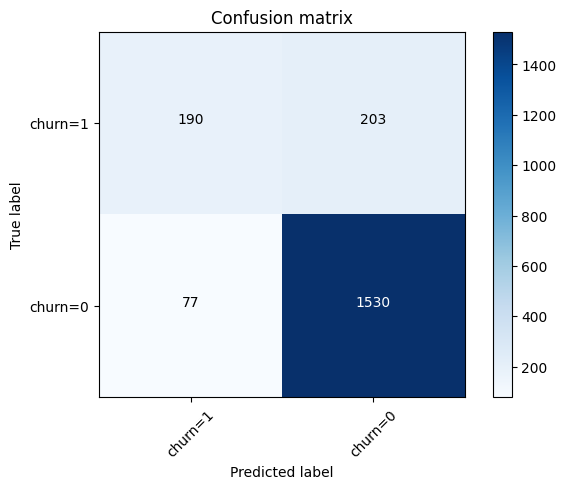

In [ ]:
y_pred = model.predict(X_test_final)
y_pred = np.round(y_pred)

cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

# Final Conclusion
In accordance to confusion matrix our own **Model with keras layer** performed **better** than other two Models i.e Logistic Regression and SVM.


---


